<h1>Assignment 1 - Question 2</h1>

In [42]:
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal
import warnings
import random
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

plt.style.use('ggplot')
np.random.seed(37)
warnings.filterwarnings('ignore')

In [43]:
np.random.seed(2)

<img src="/Users/pradnyeshchoudhari/EECE 5644 - LOCAL/Assignments/Assignment 01/Images/2.png">

In [44]:
def generate_gaussian_params(start_mean, start_cov, num_components=4):
    means = [start_mean]
    covariances = [start_cov]
    distance_factor = random.uniform(2.0, 3.0)
    
    avg_std = np.mean(np.sqrt(np.diag(start_cov)))
    target_distance = distance_factor * avg_std
    
    for _ in range(num_components - 1):
        while True:
            direction = np.random.randn(3)
            direction /= np.linalg.norm(direction)
            
            new_mean = start_mean + direction * target_distance
            
            if all(np.linalg.norm(new_mean - m) >= target_distance for m in means):
                means.append(new_mean)
                
                A = np.random.randn(3, 3)
                new_cov = np.dot(A, A.T)
                new_cov = new_cov * (np.sum(np.diag(start_cov)) / np.sum(np.diag(new_cov)))
                covariances.append(new_cov)
                
                break
    
    return means, covariances

In [45]:
mean1 = [-1, -1, -1]
covariance1 = [[2, -0.5, 0.3], [-0.5, 1, -0.5], [0.3, -0.5, 1]]

means, covariances = generate_gaussian_params(mean1, covariance1)

priors = np.array([0.3, 0.3, 0.4])

In [46]:
for i, mean in enumerate(means):
    print(f"Mean {i+1}: ", mean)

Mean 1:  [-1, -1, -1]
Mean 2:  [ 0.97351623 -3.15779871 -2.01276087]
Mean 3:  [-2.4000455  -1.04492683  1.75942029]
Mean 4:  [-2.97755192 -3.36653905 -1.25559244]


In [47]:
for i, cov in enumerate(covariances):
    print(f"Cov {i+1}: \n", cov)
    print()

Cov 1: 
 [[2, -0.5, 0.3], [-0.5, 1, -0.5], [0.3, -0.5, 1]]

Cov 2: 
 [[ 1.07760713 -1.31577081  0.31069627]
 [-1.31577081  2.35386679  0.21434559]
 [ 0.31069627  0.21434559  0.56852608]]

Cov 3: 
 [[1.7884787  1.32753134 1.09044667]
 [1.32753134 1.43563752 0.83734056]
 [1.09044667 0.83734056 0.77588378]]

Cov 4: 
 [[ 3.14991402 -0.72127957 -0.5791761 ]
 [-0.72127957  0.5733632  -0.07348668]
 [-0.5791761  -0.07348668  0.27672278]]



<img src="/Users/pradnyeshchoudhari/EECE 5644 - LOCAL/Assignments/Assignment 01/Images/2_PartA.png">

<h3>Part A - 1</h3>

In [48]:
mean2 = means[1]
mean3 = means[2]
mean4 = means[3]

covariance2 = covariances[1]
covariance3 = covariances[2]
covariance4 = covariances[3]

p_class_1 = 0.3
p_class_2 = 0.3
p_class_3 = 0.4

number_of_samples = 10000

num_samples_class1 = int(p_class_1 * number_of_samples)
num_samples_class2 = int(p_class_2 * number_of_samples)
num_samples_class3 = int(0.5 * p_class_3 * number_of_samples) 
num_samples_class4 = int(0.5 * p_class_3 * number_of_samples)

samples_class1 = np.random.multivariate_normal(mean1, covariance1, num_samples_class1)
samples_class2 = np.random.multivariate_normal(mean2, covariance2, num_samples_class2)
samples_class3 = np.random.multivariate_normal(mean3, covariance3, num_samples_class3)
samples_class4 = np.random.multivariate_normal(mean4, covariance4, num_samples_class4)

samples_class3_combined = np.vstack((samples_class3, samples_class4))

labels_class1 = np.ones(num_samples_class1)
labels_class2 = 2 * np.ones(num_samples_class2)
labels_class3 = 3 * np.ones(num_samples_class3 + num_samples_class4)

samples = np.vstack((samples_class1, samples_class2, samples_class3_combined))
labels = np.hstack((labels_class1, labels_class2, labels_class3))

In [49]:
df = pd.DataFrame(samples, columns=['x1', 'x2', 'x3'])
df['Label'] = labels

df.to_csv('data_created_for_hw1_q2_10000_samples.csv', index=False)

In [50]:
df

,x1,x2,x3,Label
0,-1.460081,-0.071713,-1.157930,1.0
1,0.548614,-2.411437,1.891539,1.0
2,-0.909978,-1.529053,-0.361921,1.0
3,0.102712,-1.074835,-0.049047,1.0
4,-0.299916,-1.085325,-1.106438,1.0
...,...,...,...,...
9995,-1.737476,-4.571486,-1.091317,3.0
9996,-2.491255,-3.042180,-1.335511,3.0
9997,-0.753233,-3.819275,-1.649710,3.0
9998,-2.867664,-3.313555,-1.206537,3.0


<h3>Part A - 2</h3>

Classification Rule for this problem is 
$$ D_{ERM} (X) = arg\min_{d \in \{1, 2, 3\}} R(D=d|X) $$
$$ D_{MAP}(X) = \arg\min_{d \in \{1, 2, 3\}} \left( \lambda(d, 1) p(1 | X) + \lambda(d, 2) p(2 | X) + \lambda(d, 3) p(3 | X) \right) $$
By using 0-1 loss matrix, we minimize the probability of error
$$ D_{MAP}(X) = \arg\min_{d \in \{1, 2, 3\}} 1 - p(d | X) $$
$$ D_{MAP}(X) = \arg\max_{d \in \{1, 2, 3\}} p(d | X) $$
Using Bayes Theorem we get,
$$ D_{MAP}(X) = \arg\max_{d \in \{1, 2, 3\}} p(x | d).P(d) $$


In [51]:
def MAP(samples, number_of_samples, priors, means, covariances, lossMatrix):
    N = number_of_samples
    C = len(priors)
    pxgivenl = np.zeros((C, N))

    pxgivenl[0, :] = multivariate_normal.pdf(samples, mean=means[0], cov=covariances[0])
    pxgivenl[1, :] = multivariate_normal.pdf(samples, mean=means[1], cov=covariances[1])
    pxgivenl[2, :] = 0.5 * (multivariate_normal.pdf(samples, mean=means[2], cov=covariances[2]) + 
                            multivariate_normal.pdf(samples, mean=means[3], cov=covariances[3]))

    px = priors @ pxgivenl
    classPosteriors = (priors[:, np.newaxis] * pxgivenl) / px
    expectedRisks = lossMatrix @ classPosteriors
    decisions = np.argmin(expectedRisks, axis=0)

    return decisions

In [52]:
def plot_result(decisions, labels):
    markers = "o*^"
    marker_size = 40
    alpha = 0.7

    fig, axs = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={'projection': '3d'})

    titles = ['Class 1 Samples', 'Class 2 Samples', 'Class 3 Samples']

    for j, ax in enumerate(axs):
        wrong = 0
        for i in range(len(samples)):
            if labels[i] == j+1:
                x, y, z = samples[i]
                true_label = int(labels[i])
                predicted_label = int(decisions[i]) + 1

                if true_label == predicted_label:
                    color = 'green'
                else:
                    color = 'red'
                    wrong+=1

                ax.scatter(x, y, z, marker=markers[j], color=color, s=marker_size, alpha=alpha)    
        print(f"Wrongly Labeled {j+1}: ", wrong)

        ax.set_xlabel('X axis', fontsize=10)
        ax.set_ylabel('Y axis', fontsize=10)
        ax.set_zlabel('Z axis', fontsize=10)
        ax.scatter([], [], [], color='green', marker=markers[j], label='Prediction == Label')
        ax.scatter([], [], [], color='red', marker=markers[j], label='Prediction != Label')
        ax.legend(loc='upper right')
        ax.set_title(titles[j], fontsize=12)
        ax.view_init(elev=30, azim=120)

    plt.tight_layout()
    plt.show()

In [53]:
def getConfusionMatrix(labels, decisions):
    confusion_matrix = np.zeros((3, 3), dtype=int)
    for true, pred in zip(labels, decisions):
        true = int(true)
        pred += 1
        confusion_matrix[pred - 1, true - 1] += 1
    
    return confusion_matrix

In [54]:
lossMatrix_0_1 = np.array([[0, 1, 1], 
                        [1, 0, 1], 
                        [1, 1, 0]])

decisions_0_1 = MAP(samples, number_of_samples, priors, means, covariances, lossMatrix_0_1)

In [55]:
getConfusionMatrix(labels, decisions_0_1)

array([[2825,   29,   17],
       [ 137, 2971,   12],
       [  38,    0, 3971]])

<h3> Part A - 3 </h3>

Wrongly Labeled 1:  175
Wrongly Labeled 2:  29
Wrongly Labeled 3:  29


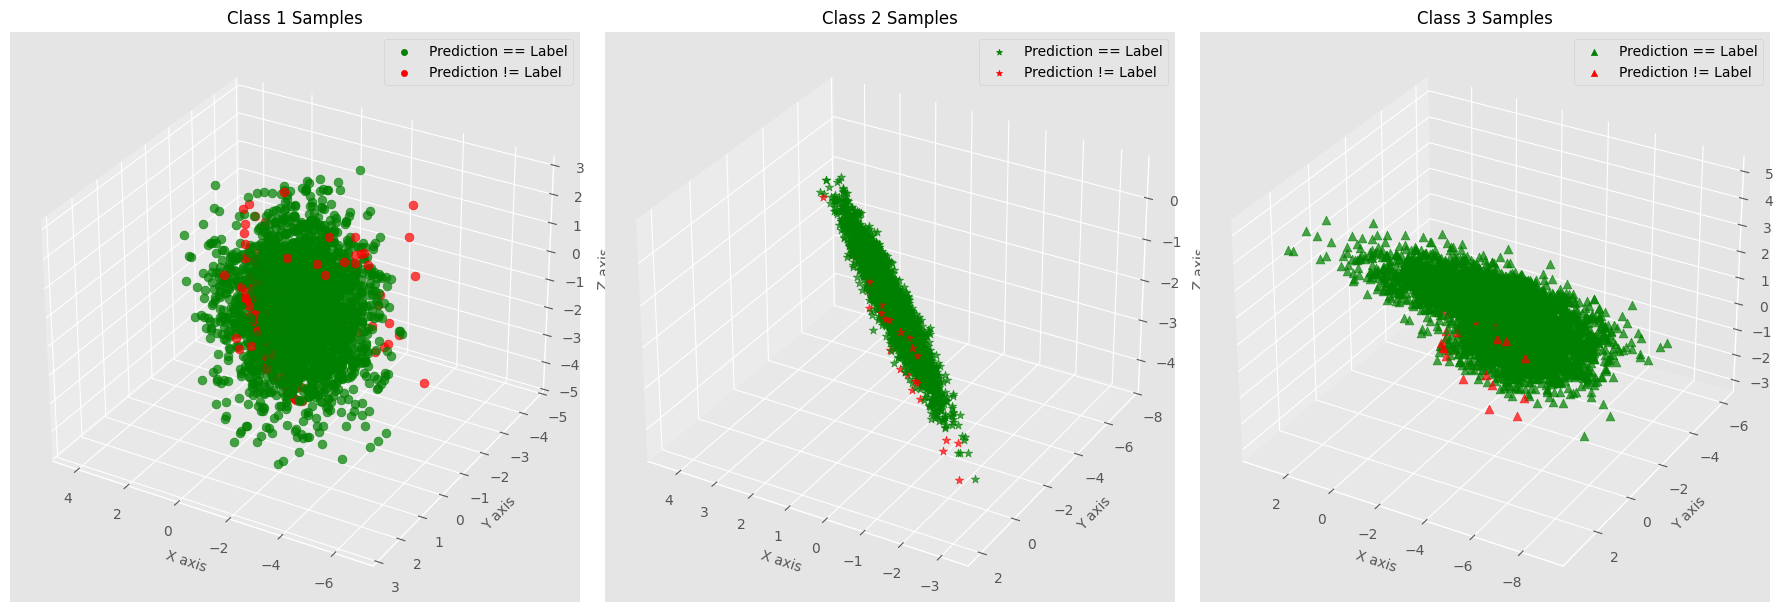

In [56]:
plot_result(decisions_0_1, labels)

<img src="/Users/pradnyeshchoudhari/EECE 5644 - LOCAL/Assignments/Assignment 01/Images/2_PartB.png">

In [57]:
lossMatrix_0_10 = np.array([[0, 10, 10], 
                            [1, 0, 10], 
                            [1, 1, 0]])

decisions_0_10 = MAP(samples, number_of_samples, priors, means, covariances, lossMatrix_0_10)

In [58]:
getConfusionMatrix(labels, decisions_0_10)

array([[2714,    1,    2],
       [ 207, 2990,    8],
       [  79,    9, 3990]])

Wrongly Labeled 1:  286
Wrongly Labeled 2:  10
Wrongly Labeled 3:  10


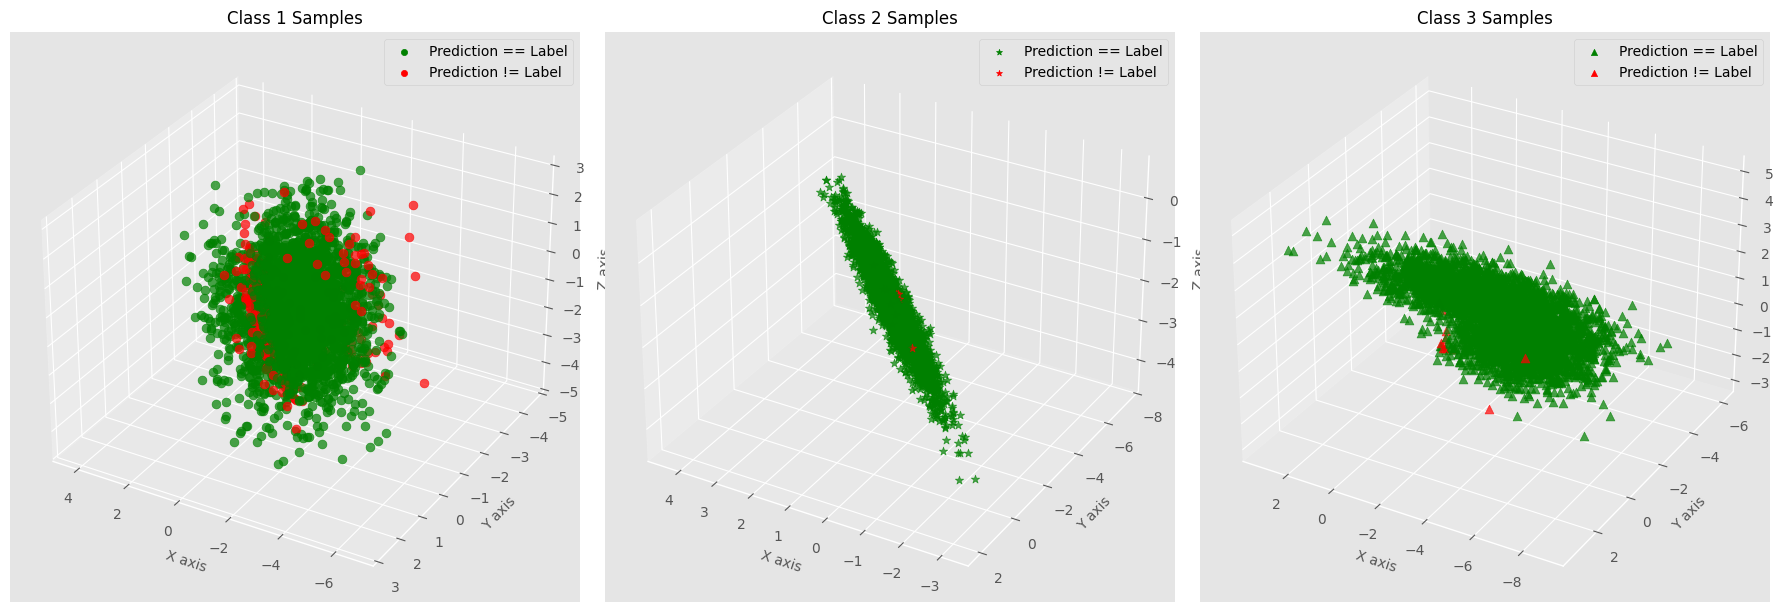

In [59]:
plot_result(decisions_0_10, labels)

In [60]:
lossMatrix_0_100 = np.array([[0, 100, 100], 
                            [1, 0, 100], 
                            [1, 1, 0]])

decisions_0_100 = MAP(samples, number_of_samples, priors, means, covariances, lossMatrix_0_100)

In [61]:
getConfusionMatrix(labels, decisions_0_100)

array([[2609,    0,    0],
       [ 253, 2823,    4],
       [ 138,  177, 3996]])

Wrongly Labeled 1:  391
Wrongly Labeled 2:  177
Wrongly Labeled 3:  4


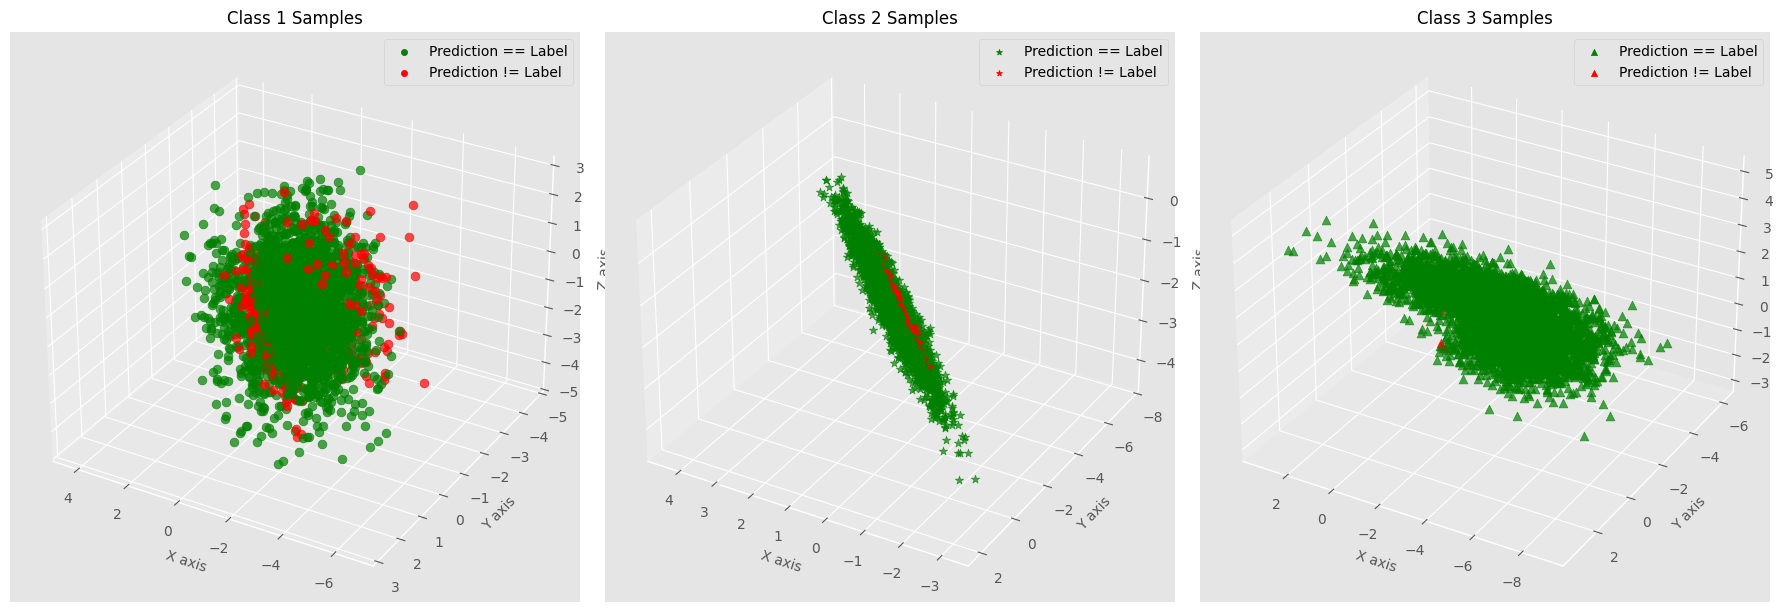

In [62]:
plot_result(decisions_0_100, labels)

In this question we classified data from a mixture of four Gaussians into three classes using Minimum Probability of Error Classification.

The classifier performed well overall, with most samples correctly classified.

Different loss matrices were tested: 0-1 loss matrix provided the best overall performance across all classes.
Increasing loss for misclassification (0-10 and 0-100 matrices) improved accuracy for the targeted class but negatively impacted others.


3D scatter plots were created to visualize correct and incorrect classifications for each class. The plots showed that most samples were correctly classified (green points), with misclassifications (red points) mostly occurring at class boundaries.

The results demonstrate that while increasing the loss for misclassification can improve accuracy for a specific class, it often comes at the cost of reduced performance for other classes. The 0-1 loss matrix provided the best balance in classification accuracy across all three classes.